In [1]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Veri setini yükleyelim
file_path = 'C:\\Users\\mahmu\\JupyterNotebook\\AygazBootcamp\\data\\healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

In [3]:
# Veri setinin ilk birkaç satırına göz atalım
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [4]:
# Veri seti hakkında genel bilgi
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [5]:
# Eksik değerleri kontrol edelim
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
# Eksik değerleri dolduralım
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

In [7]:
# Kategorik sütunları dönüştürme
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data_encoded = pd.get_dummies(data, columns=categorical_columns)


In [8]:
# Bağımsız değişkenler ve hedef değişkeni ayırma
X = data_encoded.drop(['stroke', 'id'], axis=1)  # id ve stroke sütunlarını çıkar
y = data_encoded['stroke']

In [9]:
# SMOTE öncesi sınıf dağılımını kontrol edelim
print("SMOTE öncesi sınıf dağılımı:")
print(y.value_counts())

SMOTE öncesi sınıf dağılımı:
stroke
0    4861
1     249
Name: count, dtype: int64


In [10]:
# SMOTE uygulama
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [11]:
# SMOTE sonrası sınıf dağılımını kontrol edelim
print("SMOTE sonrası sınıf dağılımı:")
print(y_resampled.value_counts())

SMOTE sonrası sınıf dağılımı:
stroke
1    4861
0    4861
Name: count, dtype: int64


In [12]:
# Yeni veri setini DataFrame'e dönüştürme (opsiyonel)
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['stroke'] = y_resampled

In [13]:
# Veriyi tekrar kullanıma hazır hale getirme
X = data_resampled.drop(['stroke'], axis=1)
y = data_resampled['stroke']

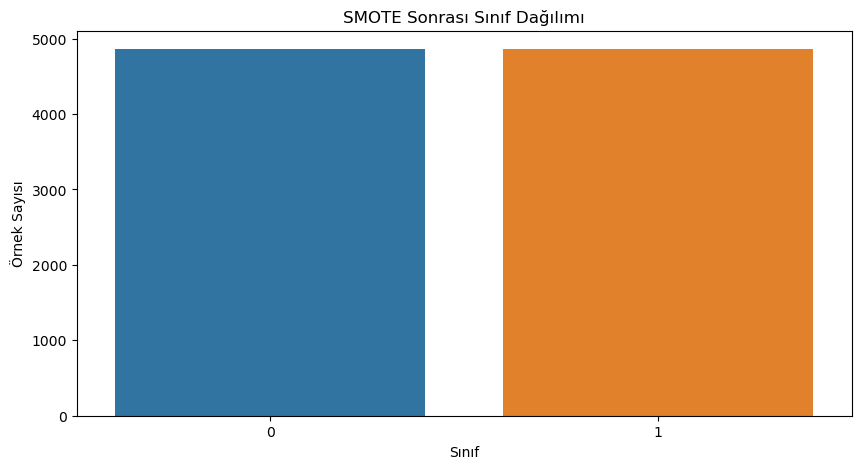

In [14]:
# SMOTE sonrası dağılımı görselleştirelim
plt.figure(figsize=(10, 5))
sns.countplot(x=y_resampled)
plt.title('SMOTE Sonrası Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Örnek Sayısı')
plt.show()

C:\Users\mahmu\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahmu\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahmu\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


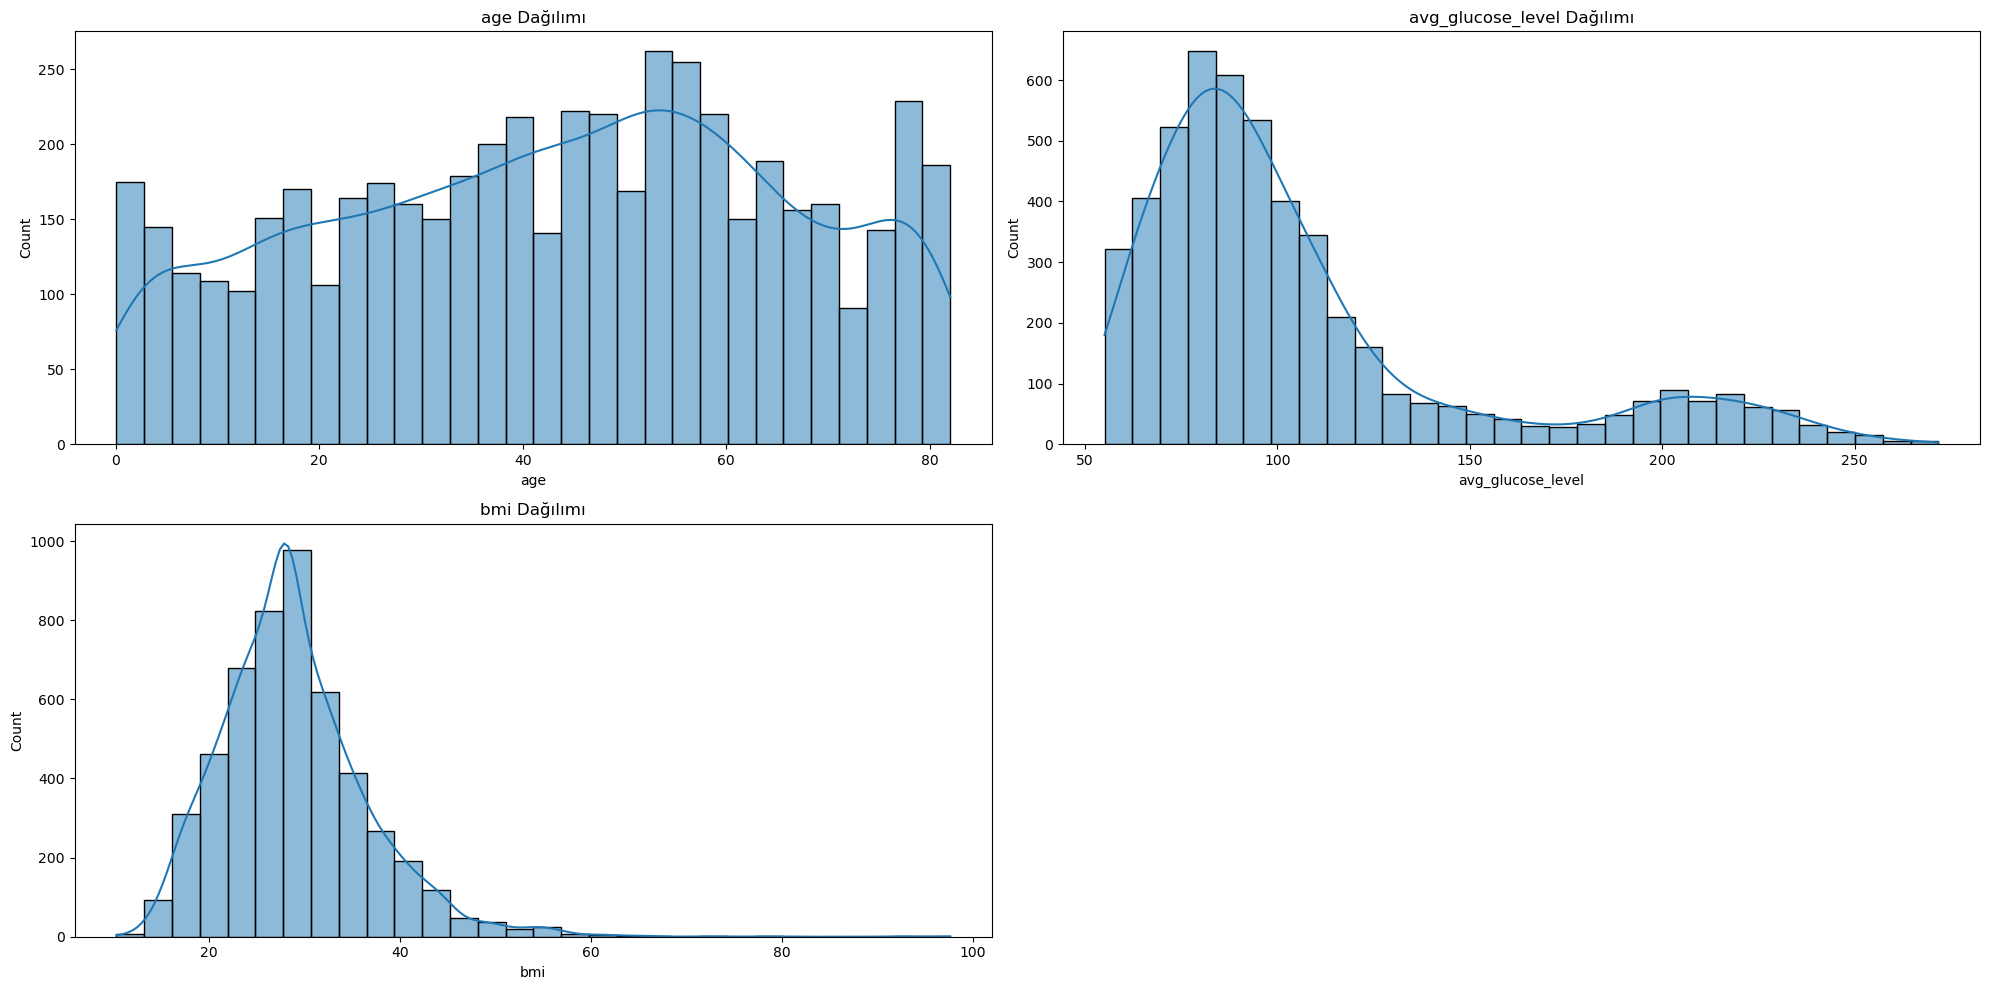

In [15]:
# Sayısal özelliklerin dağılımını görselleştirelim
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(20, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'{column} Dağılımı')
plt.tight_layout()
plt.show()

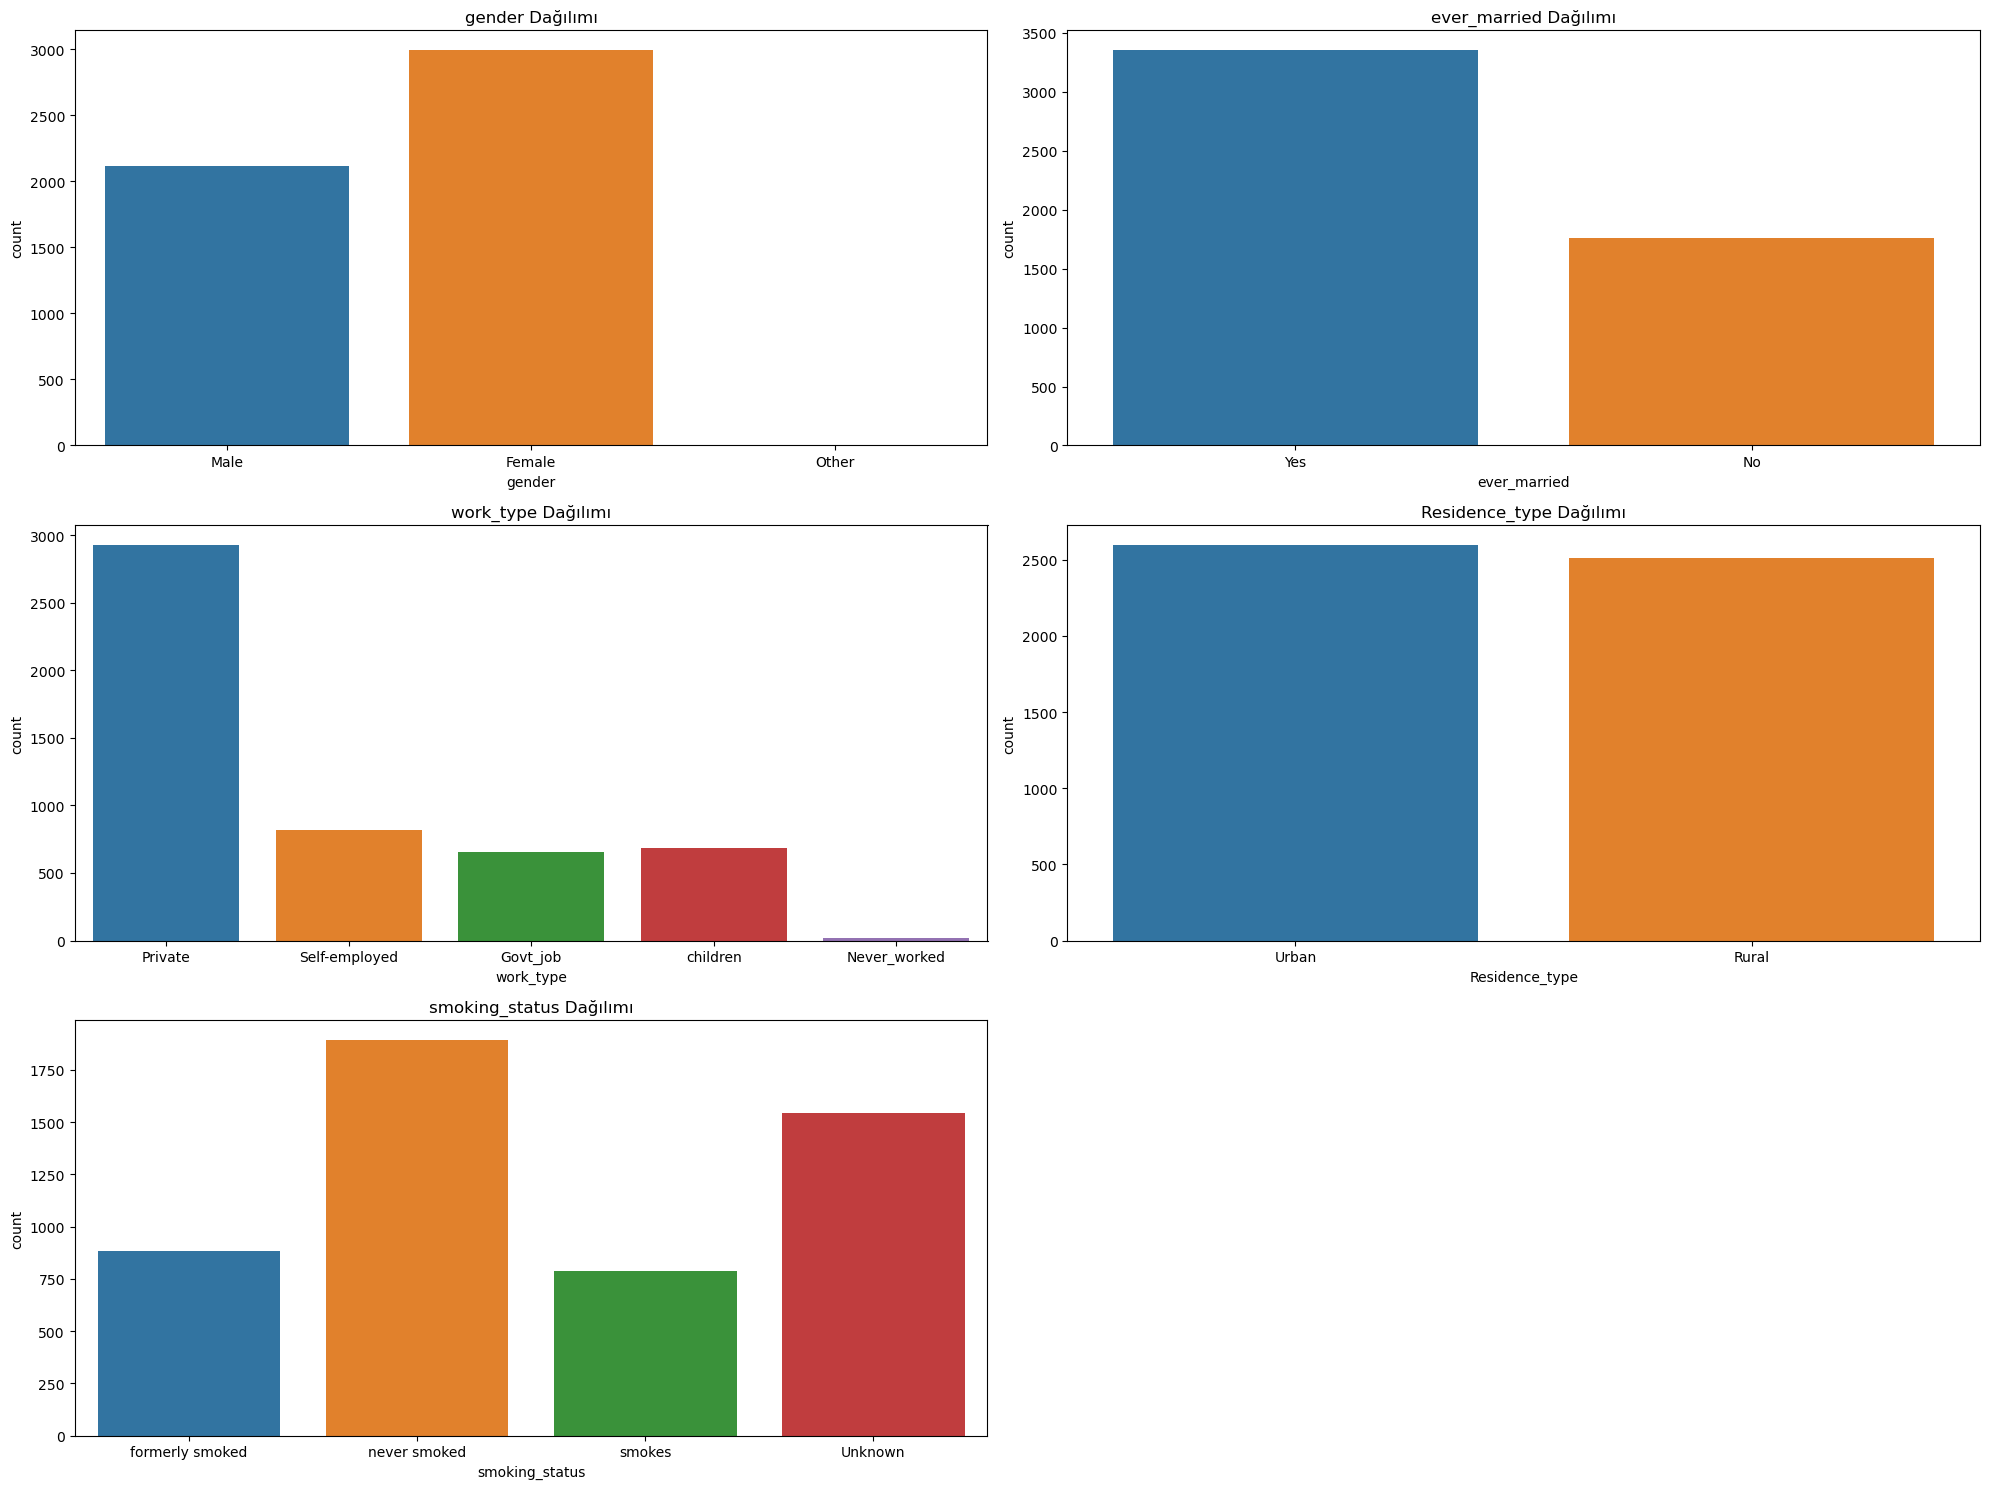

In [16]:
# Kategorik özelliklerin dağılımını görselleştirelim
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, data=data)
    plt.title(f'{column} Dağılımı')
plt.tight_layout()
plt.show()

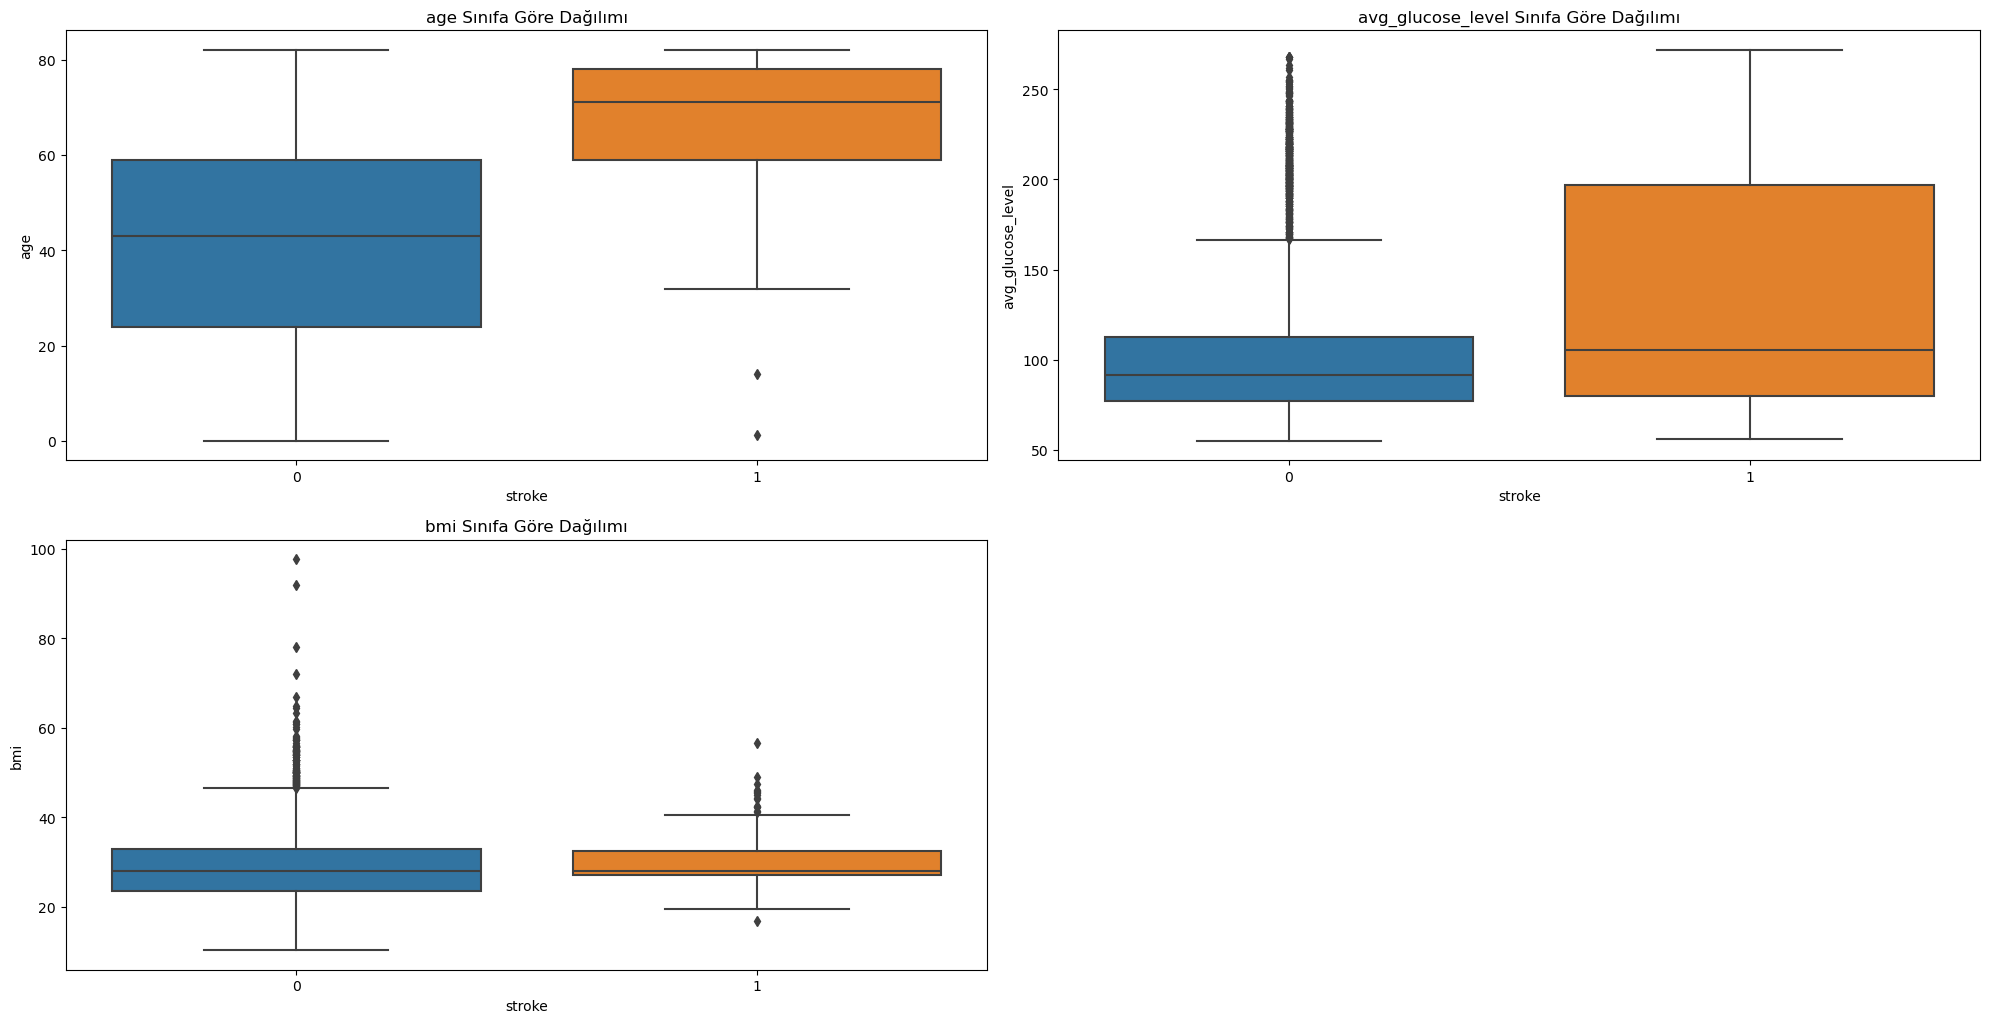

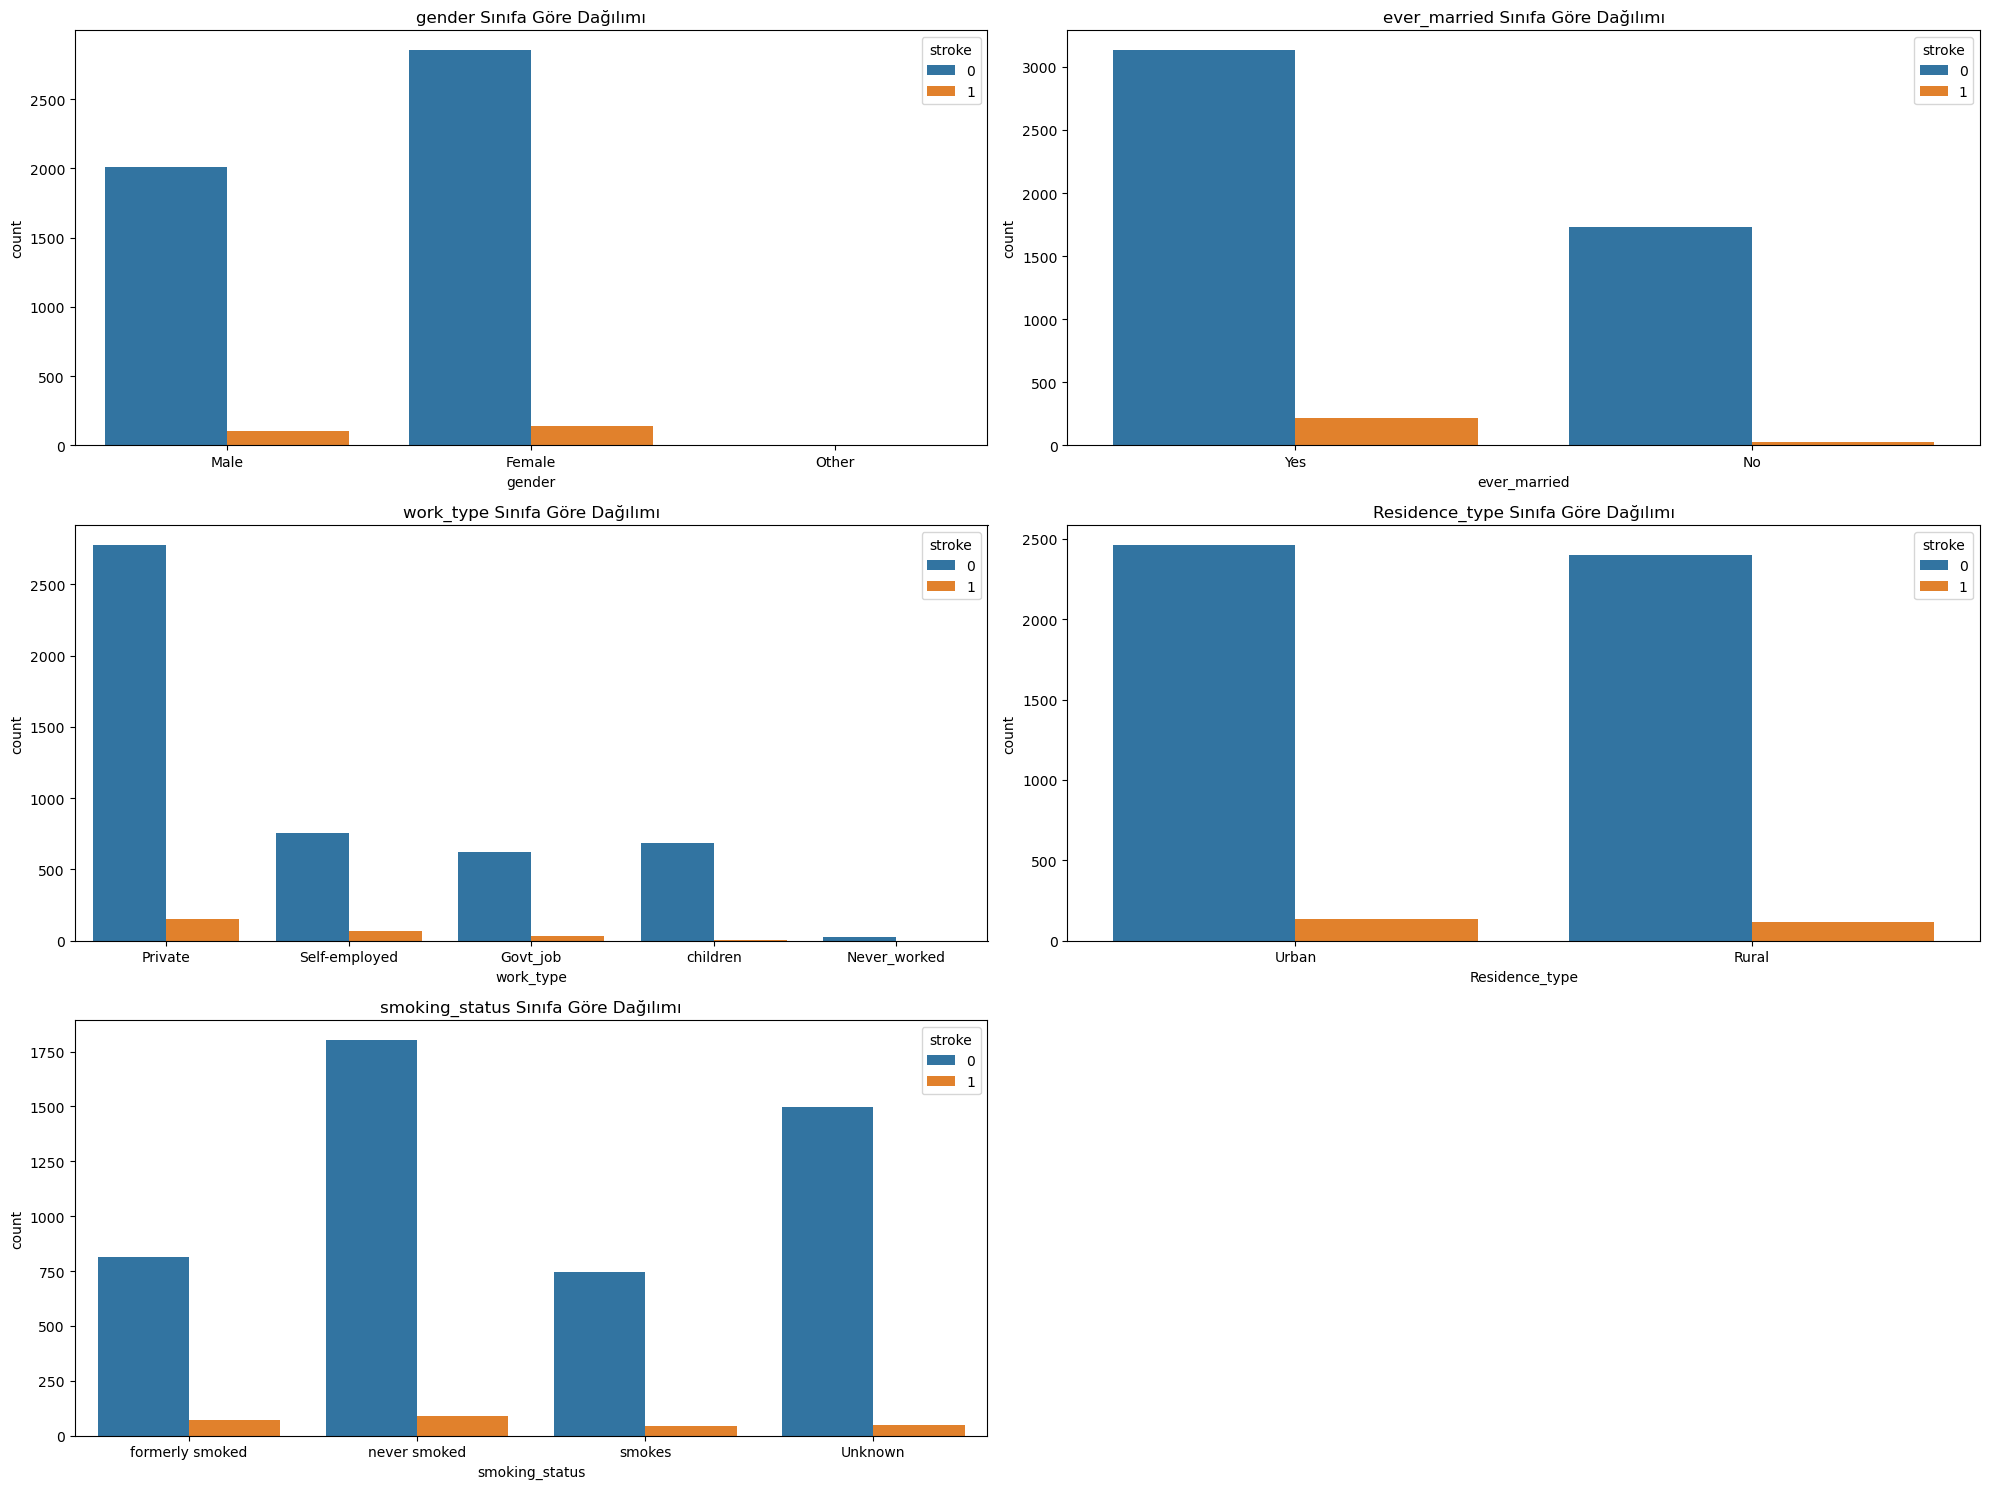

In [17]:
# Özelliklerin sınıflara göre dağılımını görselleştirelim
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='stroke', y=column, data=data)
    plt.title(f'{column} Sınıfa Göre Dağılımı')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, hue='stroke', data=data)
    plt.title(f'{column} Sınıfa Göre Dağılımı')
plt.tight_layout()
plt.show()

In [18]:
# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [19]:
# Özellikleri ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Logistic Regression modeli ile eğitme
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [21]:
# Tahmin yapma
y_pred = model.predict(X_test)

In [22]:
# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Doğruluk (Accuracy): {accuracy:.4f}')
print(f'Hassasiyet (Precision): {precision:.4f}')
print(f'Duyarlılık (Recall): {recall:.4f}')
print(f'F1 Skoru (F1 Score): {f1:.4f}')

Doğruluk (Accuracy): 0.9568
Hassasiyet (Precision): 0.9944
Duyarlılık (Recall): 0.9186
F1 Skoru (F1 Score): 0.9550


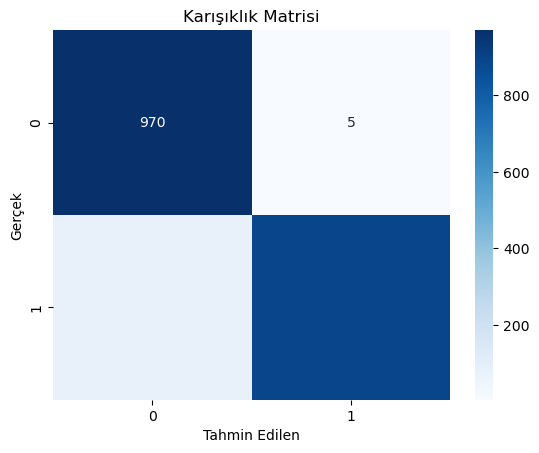

In [23]:
# Karışıklık matrisi (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()